# VQC_vs_SVM

## 1. Preparar el entorno en Google Colab

In [1]:
!pip install numpy pandas matplotlib scikit-learn \
qiskit==0.45.2 \
qiskit-aer==0.13.3 \
qiskit-machine-learning==0.7.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of qiskit-algorithms to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 9.7 MB/s eta 0:00:00
  Created wheel f

## 2. Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from qiskit import Aer
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC


/tmp/ipython-input-580481791.py:12: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


## 3. Carga del dataset

In [2]:
data = pd.read_csv("WineQT.csv")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## 4. Análisis exploratorio de datos (EDA)

### 4.1 Dimensiones y estructura

In [3]:
data.shape


(1143, 13)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### 4.2 Distribución de clases

In [6]:
data["quality"].value_counts()


,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


### 4.3 Conversión a problema binario

In [7]:
data["label"] = data["quality"].apply(lambda x: 1 if x >= 6 else 0)
data["label"].value_counts()


,count
label,
1,621
0,522


### 4.4 Selección de características

In [8]:
features = ["alcohol", "volatile acidity"]
X = data[features].values
y = data["label"].values


### 4.5 Visualización

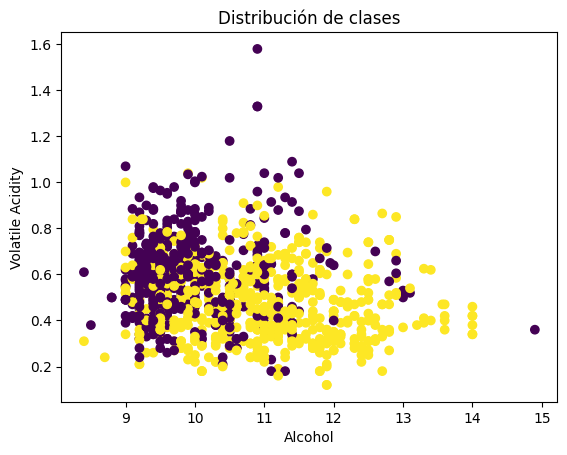

In [9]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")
plt.title("Distribución de clases")
plt.show()


## 5. Preprocesamiento

### 5.1 Normalización (clave para QML)

In [10]:
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)


### 5.2 Train / Test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


## 6. Definición del modelo cuántico (VQC)

### 6.1 Reproducibilidad

In [12]:
algorithm_globals.random_seed = 42


/tmp/ipython-input-4100810645.py:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 42


### 6.2 Backend cuántico (simulador)

In [13]:
backend = Aer.get_backend("aer_simulator_statevector")


### 6.3 Feature Map

In [14]:
num_qubits = X_train.shape[1]

feature_map = ZZFeatureMap(
    feature_dimension=num_qubits,
    reps=2
)


### 6.4 Circuito variacional

In [15]:
ansatz = TwoLocal(
    num_qubits,
    rotation_blocks=["ry", "rz"],
    entanglement_blocks="cz",
    reps=2,
    entanglement="full"
)


### 6.5 Optimizador clásico

In [16]:
optimizer = COBYLA(maxiter=100)


### 6.6 Modelo VQC

In [19]:
from qiskit.primitives import Sampler

sampler = Sampler()

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=sampler
)

## 7. Entrenamiento

In [20]:
print("Entrenando VQC...")
vqc.fit(X_train, y_train)


Entrenando VQC...


## 8. Evaluación del modelo

In [21]:
y_pred = vqc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy VQC: {accuracy:.4f}")


Accuracy VQC: 0.6327
